<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [2]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [3]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [4]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [5]:
npR

array([[-1.7775, -1.0985, -0.8276, -1.1212, -1.0101],
       [ 0.    , -0.4812, -0.1683, -0.1805,  0.0175],
       [ 0.    ,  0.    , -0.3619, -0.5072,  0.0936],
       [ 0.    ,  0.    ,  0.    , -0.2304, -0.1617],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.1036]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [6]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)

    for j in range(n):
        v = A[:,j]
        for i in range(j):
            R[i,j] = Q[:,i].T @ A[:,j]
            v = v - R[i,j] * Q[:,i]
        R[j,j] = np.linalg.norm(v)
        Q[:,j] = v / R[j,j]

    return Q, R

In [7]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [8]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [9]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [10]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    
    for j in range(n):
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j] / R[j,j]
        
        for k in range(j+1, n):
            R[j,k] = np.dot(Q[:,j], V[:,k])
            V[:,k] = V[:,k] - R[j,k] * Q[:,j]
    
    return Q, R


In [11]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [12]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [14]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [15]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

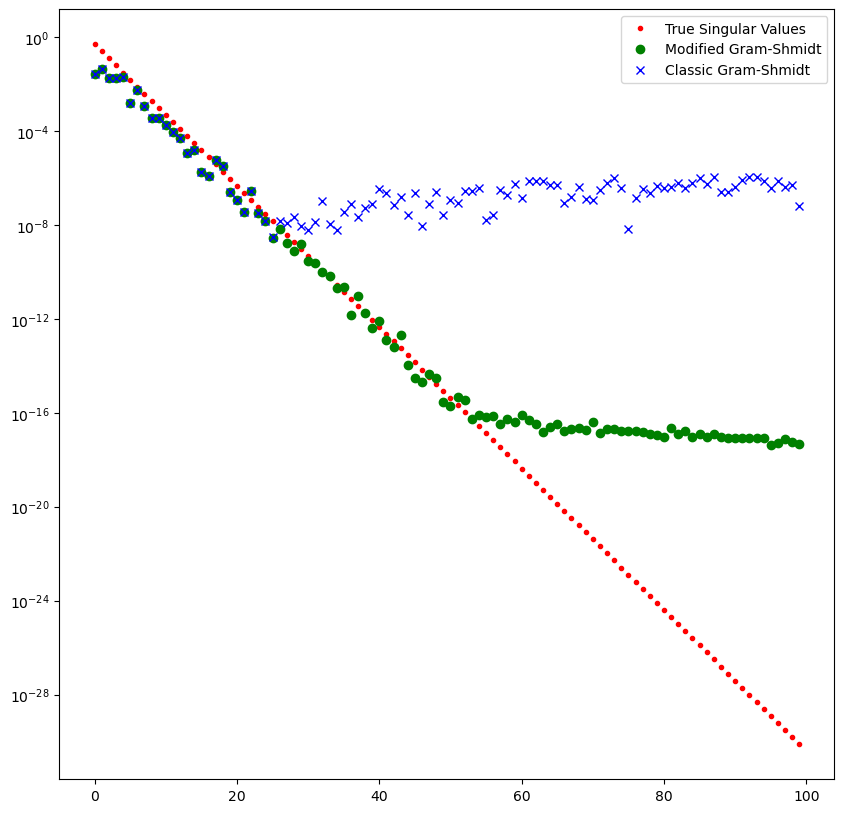

In [16]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx',  label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [17]:
def Eigenvalue(A, itr):
    B = A.copy()
    for _ in range(itr):
        Q, R = mgs(B)
        B = R @ Q
    return np.diag(B)

In [18]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
eigenvalue_1 = np.sort(Eigenvalue(A,1))
print("eigenvalues Of A with QR Algoritm for 1 iteration is : ",eigenvalue_1)

eigenvalue_5 = np.sort(Eigenvalue(A,5))
print("eigenvalues Of A with QR Algoritm for  5 iterations is : ",eigenvalue_5)

eigenvalue_10 = np.sort(Eigenvalue(A,10))
print("eigenvalues Of A with QR Algoritm for  10 iterations is : ",eigenvalue_10)

eigenvalue_20 = np.sort(Eigenvalue(A,20))
print("eigenvalues Of A with QR Algoritm for  20 iterations is : ",eigenvalue_20)

eigenvalue_100 = np.sort(Eigenvalue(A,100))
print("eigenvalues Of A with QR Algoritm for  100 iterations is : ",eigenvalue_100)

##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]
eigenvalues Of A with QR Algoritm for 1 iteration is :  [0. 2. 2. 3.]
eigenvalues Of A with QR Algoritm for  5 iterations is :  [-0.247   1.4541  2.7929  3.    ]
eigenvalues Of A with QR Algoritm for  10 iterations is :  [-0.247   1.4451  2.8019  3.    ]
eigenvalues Of A with QR Algoritm for  20 iterations is :  [-0.247   1.445   2.8019  3.    ]
eigenvalues Of A with QR Algoritm for  100 iterations is :  [-0.247   1.445   2.8019  3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

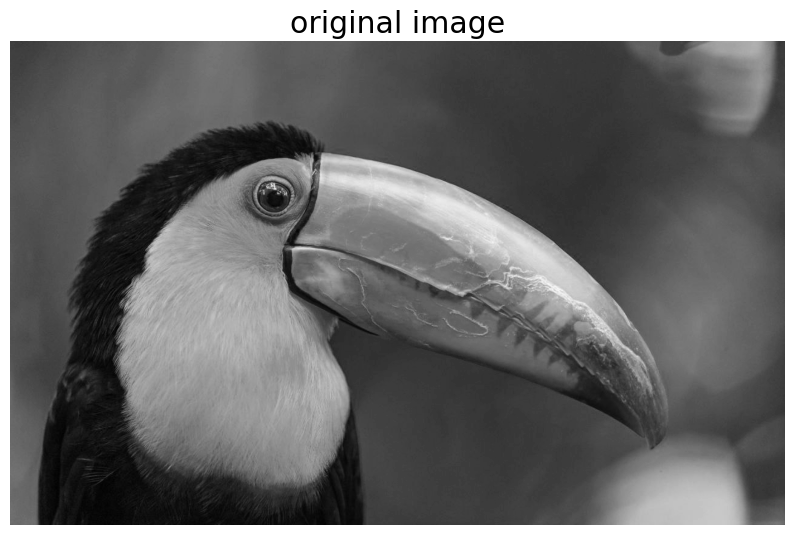

r=5, PSNR=22.44dB


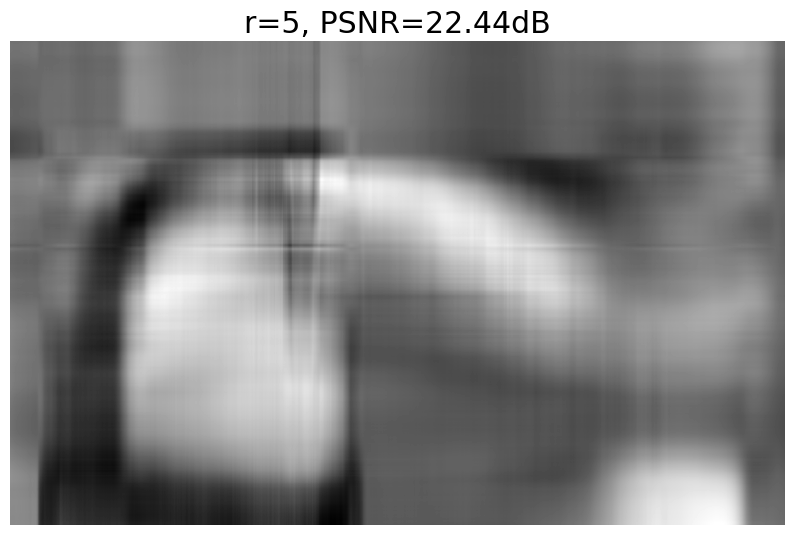

r=10, PSNR=26.92dB


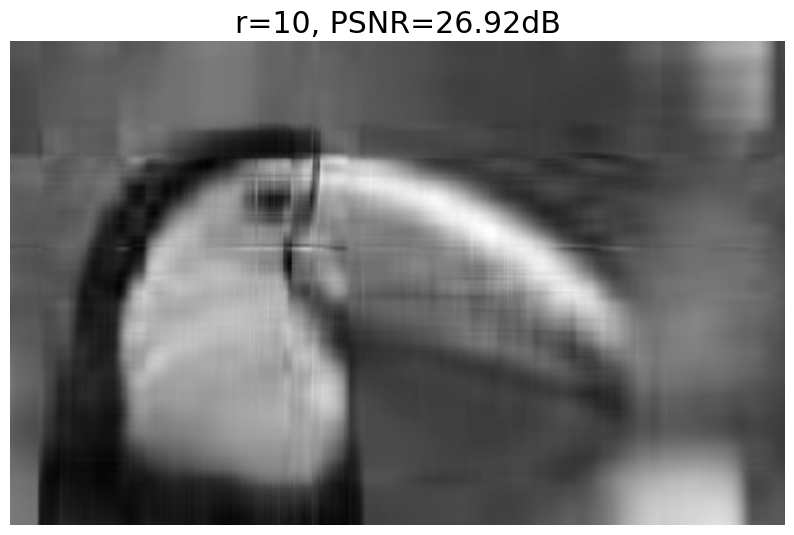

r=20, PSNR=29.99dB


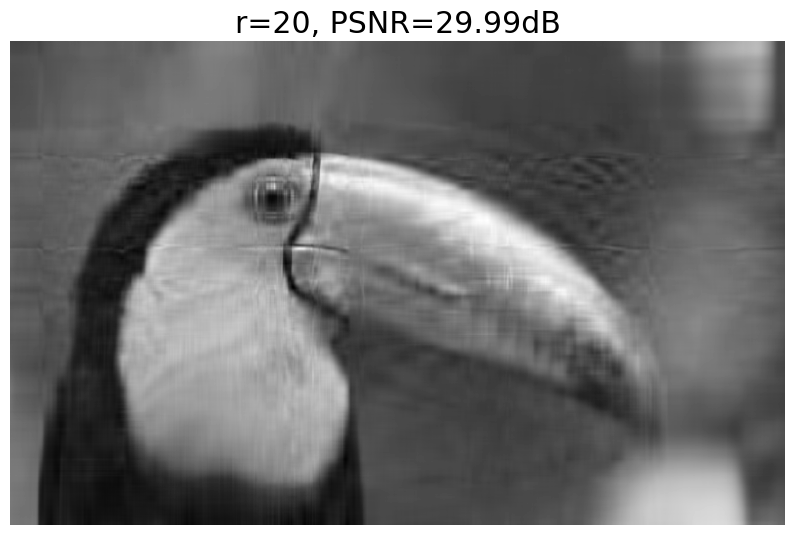

r=30, PSNR=31.78dB


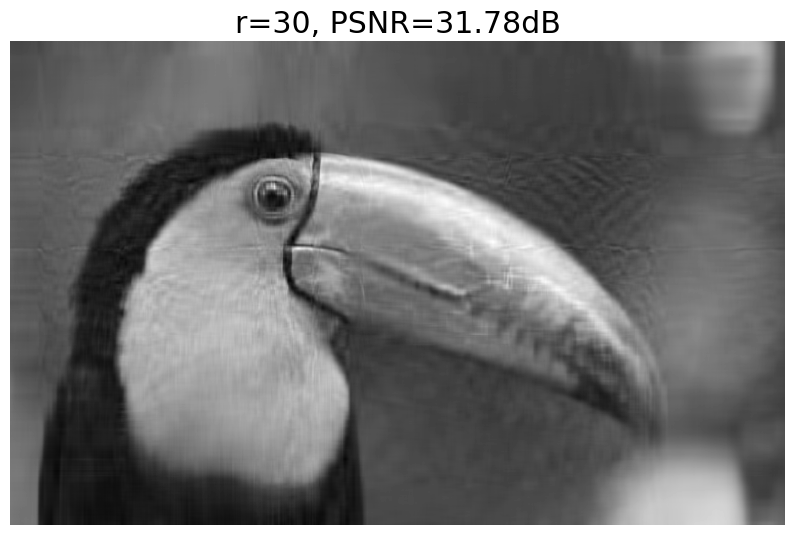

r=50, PSNR=34.13dB


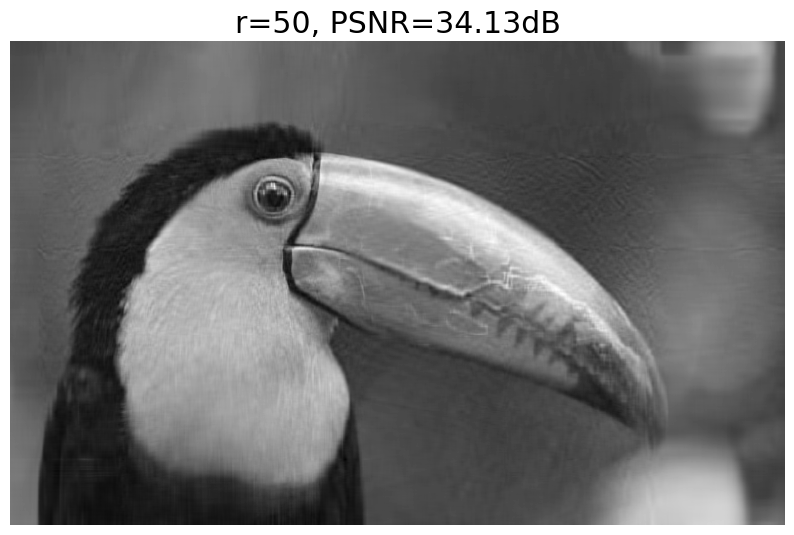

r=75, PSNR=36.09dB


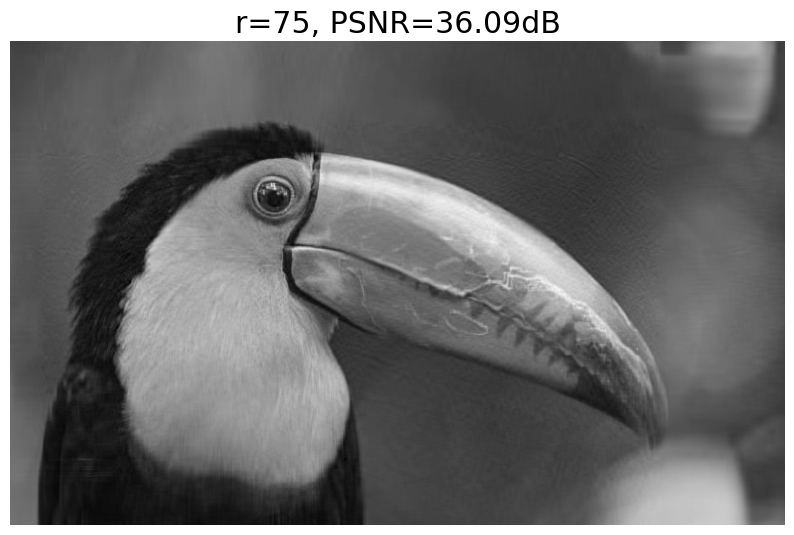

r=100, PSNR=37.68dB


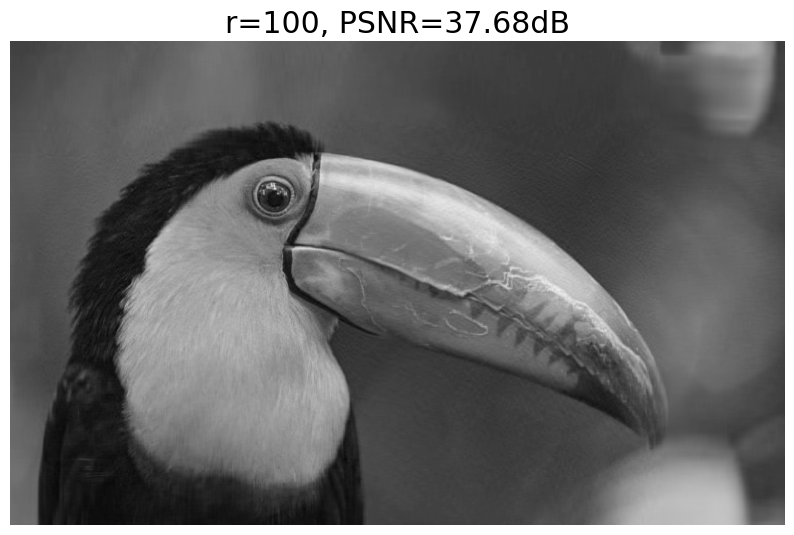

r=150, PSNR=40.43dB


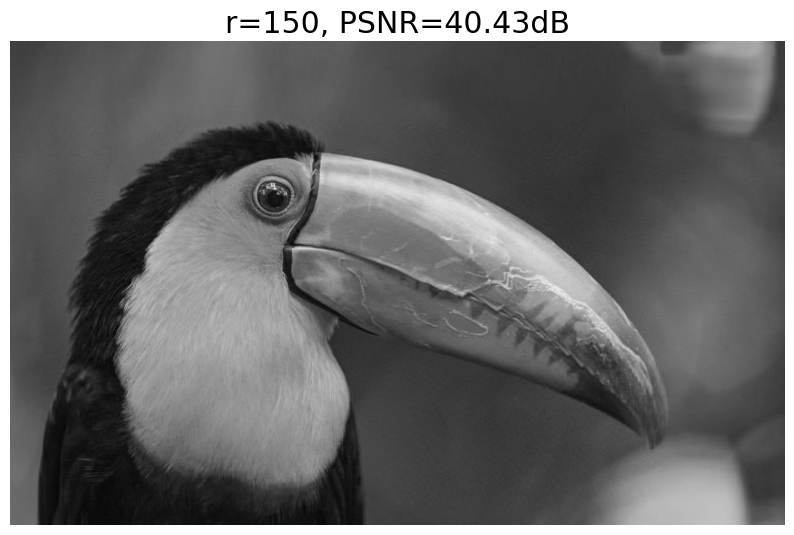

r=200, PSNR=43.00dB


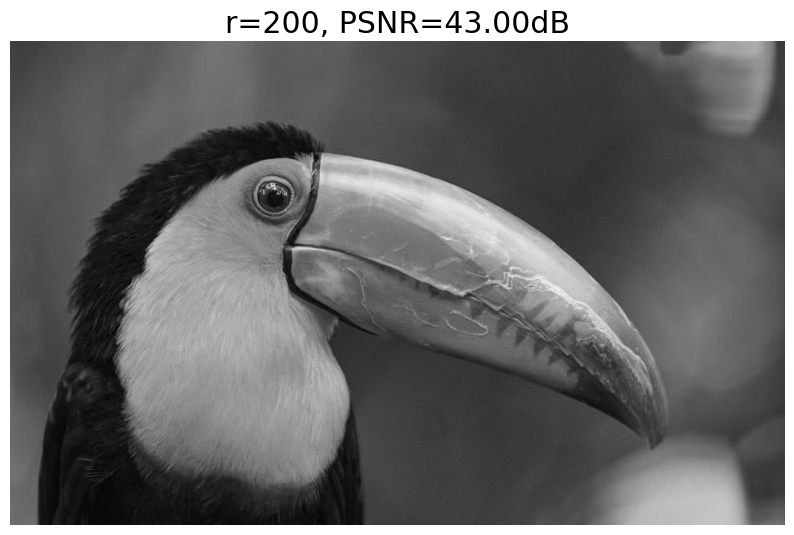

r=250, PSNR=45.54dB


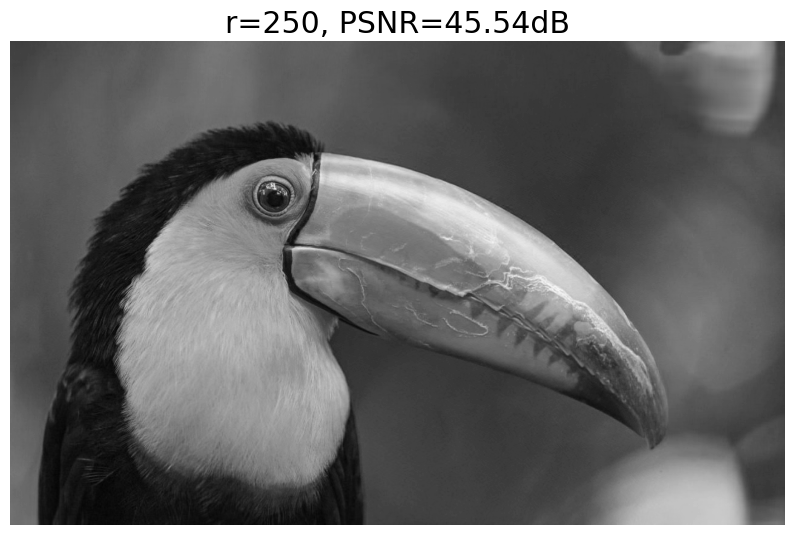

r=300, PSNR=48.14dB


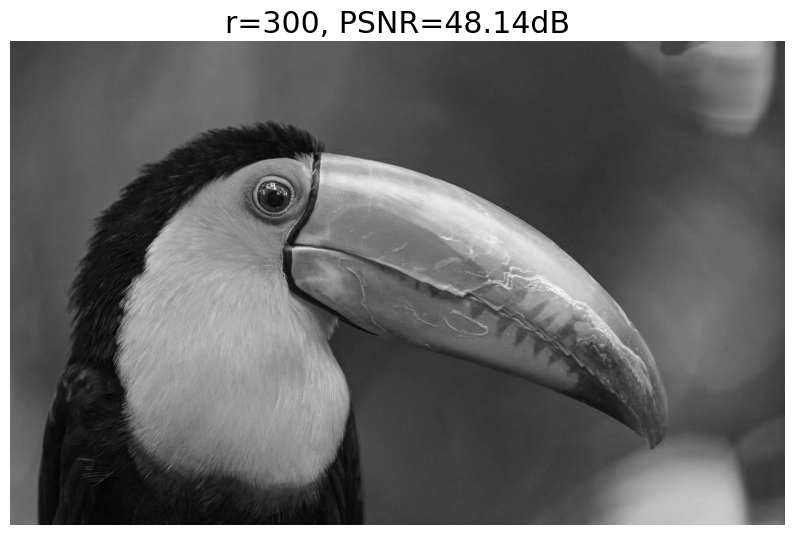

Text(0.5, 1.0, 'PSNR vs. r in SVD compression')

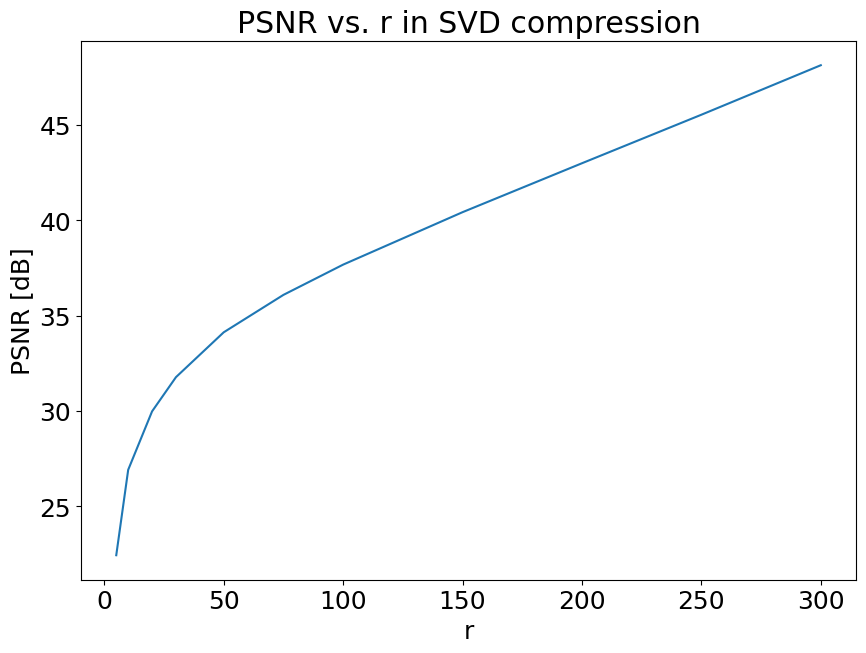

In [19]:
import numpy as np
##Your Code start here
import matplotlib.pyplot as plt


def calculate_psnr(img1, img2):
    # Ensure the images are the same size
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions.")
    
    # Calculate the mean squared error
    mse = np.mean((img1 - img2) ** 2)
    
    # If the MSE is zero, the images are identical and the PSNR is infinity
    if mse == 0:
        return float('inf')
    
    # Otherwise, calculate the PSNR
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    
    return psnr



# Load the image
image = plt.imread('pic.jpg')

# Convert the image to grayscale
gray_image = np.mean(image, axis=2)

plt.figure(figsize=(10, 7))
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('original image')
plt.show()



# Perform SVD analysis
U, S, V = np.linalg.svd(gray_image)

# Set the number of singular values to keep (compression level)
r_range = [5, 10 , 20 , 30 , 50 , 75 , 100 , 150 , 200 , 250 , 300]
psnr_list = []

for r in r_range : 
    # Reconstruct the image using the selected singular values
    compressed_image = U[:, :r] @ np.diag(S[:r]) @ V[:r, :]
    # Calculate the PSNR
    psnr = calculate_psnr(gray_image, compressed_image)
    psnr_list.append(psnr)
    print(f'r={r}, PSNR={psnr:.2f}dB')
    # Plot the compressed image
    plt.figure(figsize=(10, 7))
    plt.imshow(compressed_image, cmap='gray')
    plt.axis('off')
    plt.title(f'r={r}, PSNR={psnr:.2f}dB')
    plt.show()
    
plt.figure(figsize=(10, 7))
plt.plot(r_range, psnr_list)
plt.ylabel('PSNR [dB]')
#plt.xlim(0, 300)
plt.xlabel('r')
plt.title('PSNR vs. r in SVD compression')

##Your Code ends here

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


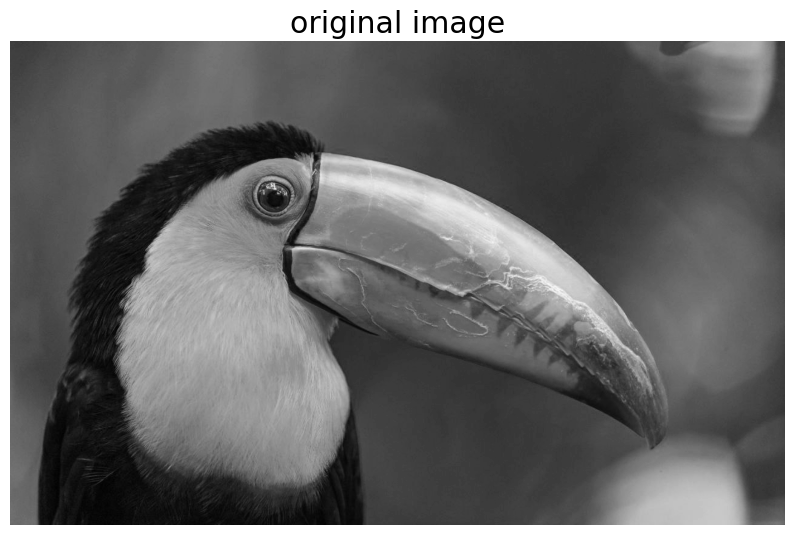

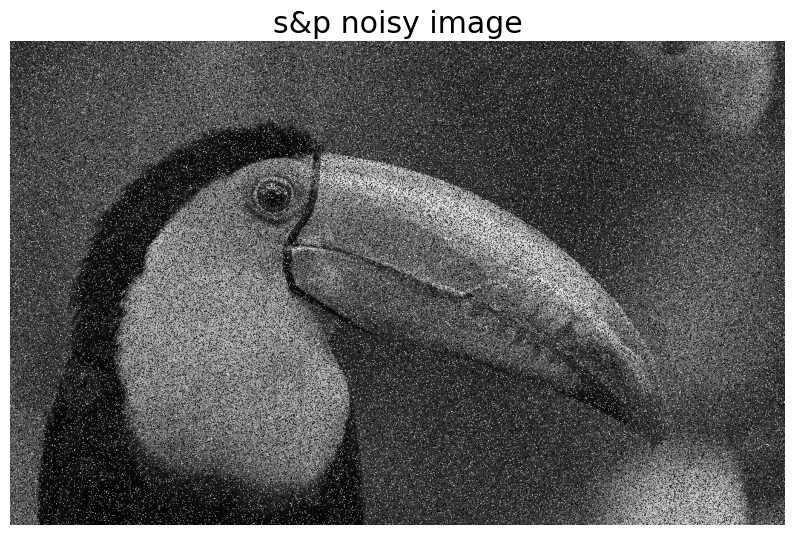

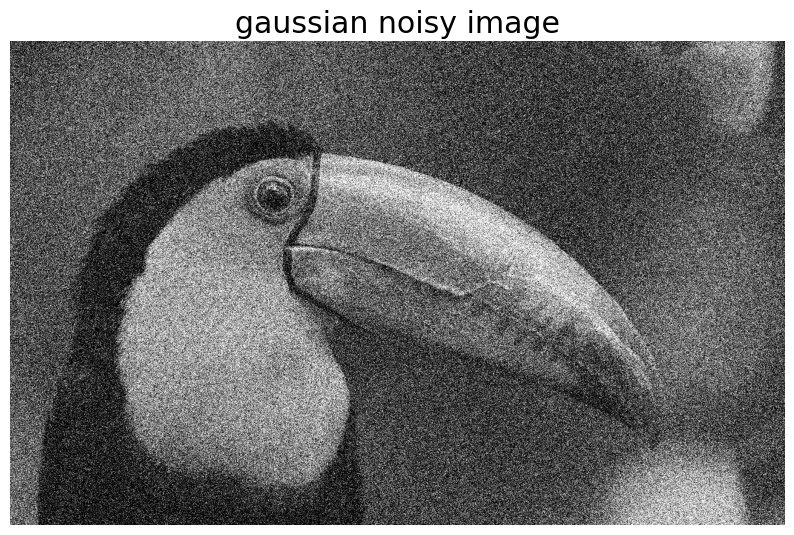

PSNR of salt and pepper noisy picture:  12.724336095455016
PSNR of gaussian noisy picture:  12.464368326674508
r=5, PSNR (Salt and Pepper)=20.03dB, PSNR (Gaussian)=21.45dB


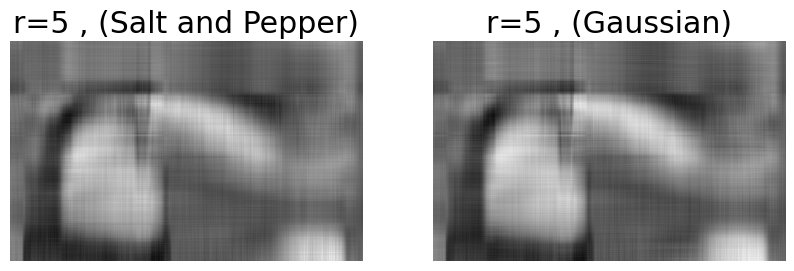

r=10, PSNR (Salt and Pepper)=21.44dB, PSNR (Gaussian)=23.68dB


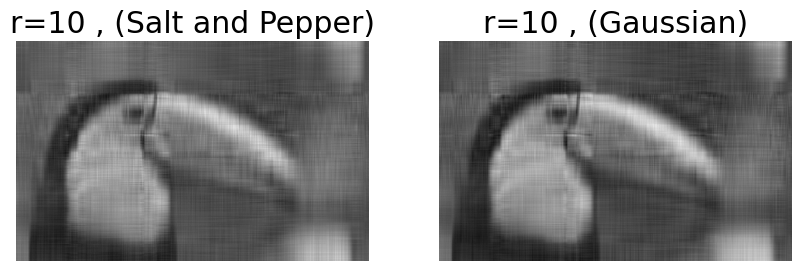

r=20, PSNR (Salt and Pepper)=20.72dB, PSNR (Gaussian)=22.51dB


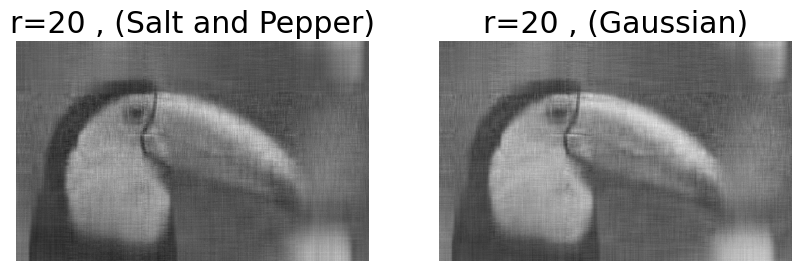

r=30, PSNR (Salt and Pepper)=19.95dB, PSNR (Gaussian)=21.26dB


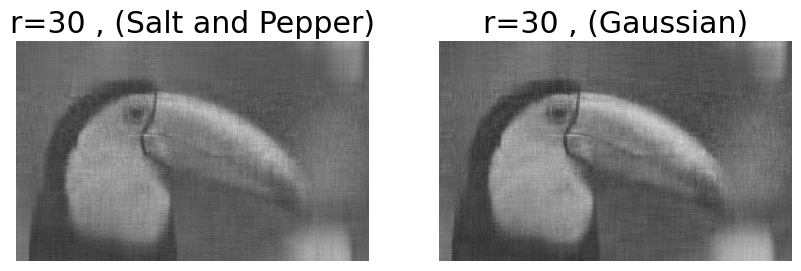

r=50, PSNR (Salt and Pepper)=18.77dB, PSNR (Gaussian)=19.57dB


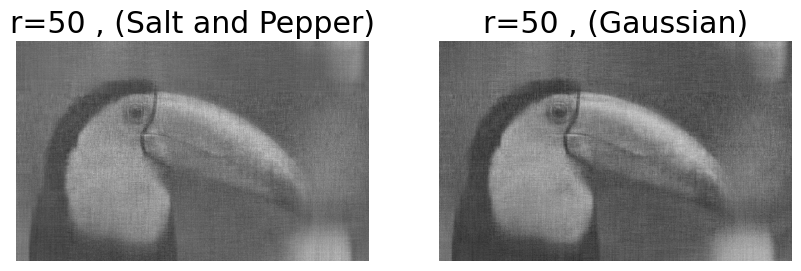

r=75, PSNR (Salt and Pepper)=17.72dB, PSNR (Gaussian)=18.20dB


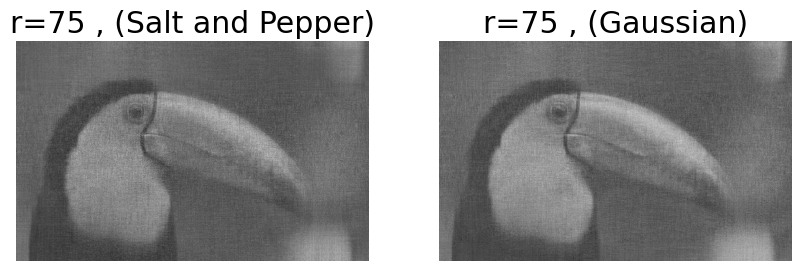

r=100, PSNR (Salt and Pepper)=16.94dB, PSNR (Gaussian)=17.24dB


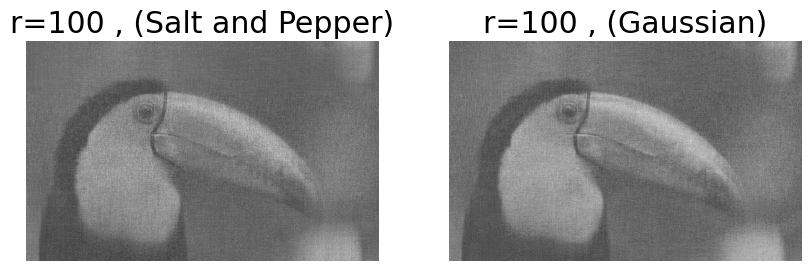

r=150, PSNR (Salt and Pepper)=15.82dB, PSNR (Gaussian)=15.92dB


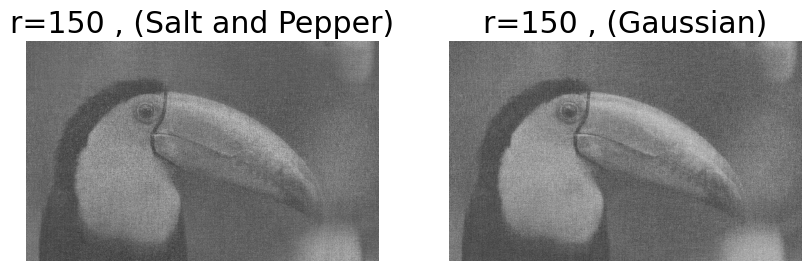

r=200, PSNR (Salt and Pepper)=15.06dB, PSNR (Gaussian)=15.05dB


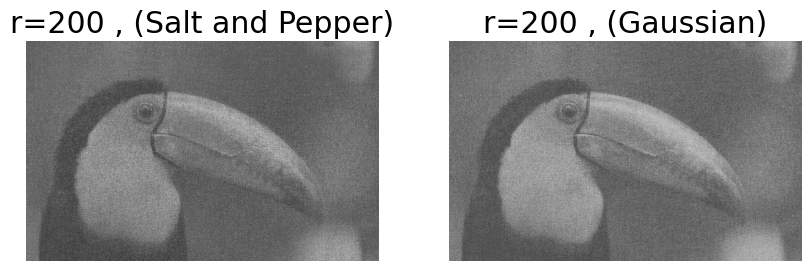

r=250, PSNR (Salt and Pepper)=14.50dB, PSNR (Gaussian)=14.42dB


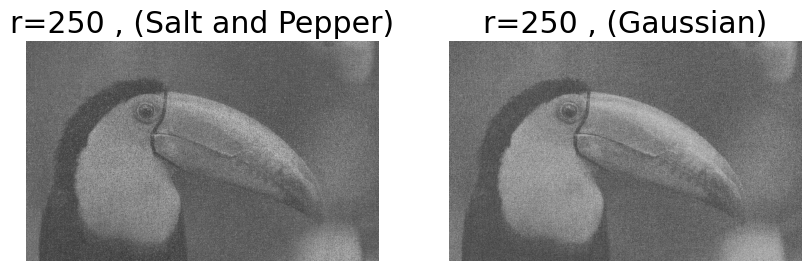

r=300, PSNR (Salt and Pepper)=14.07dB, PSNR (Gaussian)=13.94dB


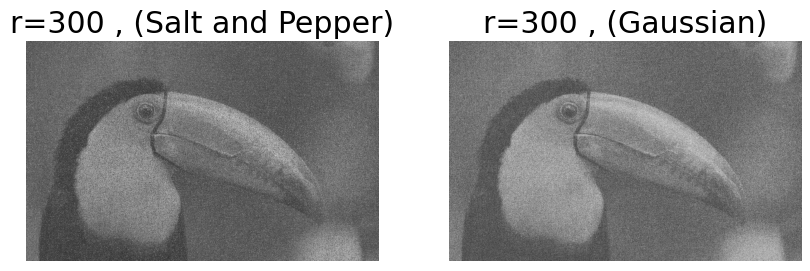

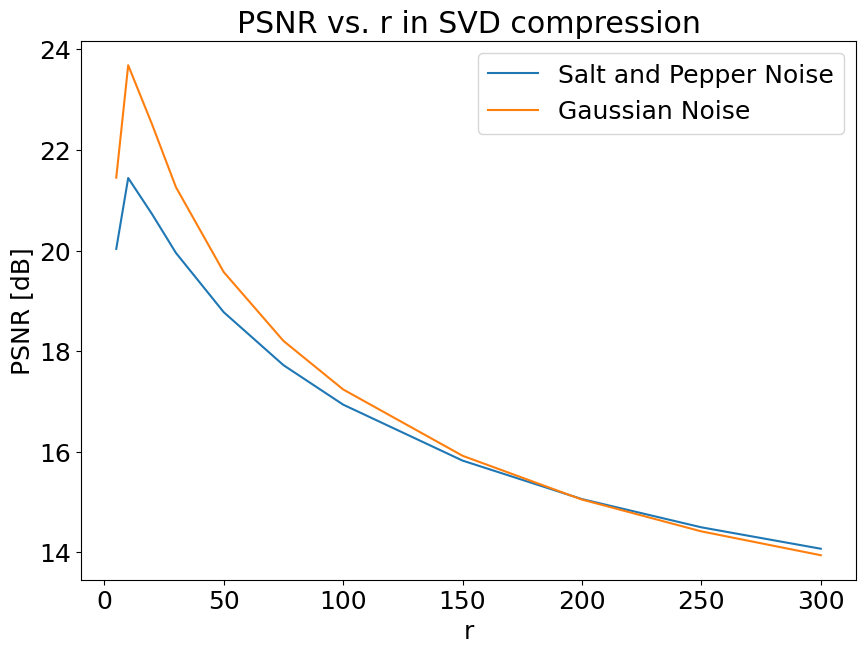

In [20]:
import numpy as np
from skimage.util import random_noise
import matplotlib.pyplot as plt


def salt_and_pepper_noisy_picture(image, noise_prob = 0.3 , salt_vs_pepper = 0.2):
    output = np.copy(image)
    num_total_pixels = image.shape[0] * image.shape[1]

    # Add salt noise
    num_salt = int(noise_prob * num_total_pixels * salt_vs_pepper)
    for _ in range(num_salt):
        x_coord = np.random.randint(0, image.shape[0])
        y_coord = np.random.randint(0, image.shape[1])
        output[x_coord, y_coord] = 255

    # Add pepper noise
    num_pepper = int(noise_prob * num_total_pixels * (1.0 - salt_vs_pepper))
    for _ in range(num_pepper):
        x_coord = np.random.randint(0, image.shape[0])
        y_coord = np.random.randint(0, image.shape[1])
        output[x_coord, y_coord] = 0

    return output


def gaussian_noisy_picture(image , mean=0 , sigma=70):
    noisy_image = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            gauss = np.random.normal(mean, sigma)
            noisy_image[i, j] += gauss
    return np.clip(noisy_image, 0, 255).astype(np.uint8)


image = plt.imread('pic.jpg')

# Convert the image to grayscale
gray_image = np.mean(image, axis=2)
plt.figure(figsize=(10, 7))
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('original image')
plt.show()


# Add salt and pepper noise
salt_pepper_noisy_pic = salt_and_pepper_noisy_picture(gray_image)
plt.figure(figsize=(10, 7))
plt.imshow(salt_pepper_noisy_pic , cmap='gray')
plt.axis('off')
plt.title('s&p noisy image')
plt.show()


# Add Gaussian noise
gaussian_noisy_pic = gaussian_noisy_picture(gray_image)
plt.figure(figsize=(10, 7))
plt.imshow(gaussian_noisy_pic, cmap='gray')
plt.axis('off')
plt.title('gaussian noisy image')
plt.show()





print("PSNR of salt and pepper noisy picture: ",calculate_psnr(gray_image,salt_pepper_noisy_pic))
print("PSNR of gaussian noisy picture: ",calculate_psnr(gray_image,gaussian_noisy_pic))





# Perform SVD analysis on the noisy images
U_sp, S_sp, V_sp = np.linalg.svd(salt_pepper_noisy_pic)
U_gn, S_gn, V_gn = np.linalg.svd(gaussian_noisy_pic)

# Set the number of singular values to keep (compression level)
r_range = [5, 10, 20, 30, 50, 75, 100, 150, 200, 250, 300]
psnr_sp_list = []
psnr_gn_list = []

for r in r_range:
    # Reconstruct the image using the selected singular values
    compressed_image_sp = U_sp[:, :r] @ np.diag(S_sp[:r]) @ V_sp[:r, :]
    compressed_image_gn = U_gn[:, :r] @ np.diag(S_gn[:r]) @ V_gn[:r, :]
    
    # Calculate the PSNR for salt and pepper noise
    psnr_sp = calculate_psnr(gray_image, compressed_image_sp)
    psnr_sp_list.append(psnr_sp)
    
    # Calculate the PSNR for Gaussian noise
    psnr_gn = calculate_psnr(gray_image, compressed_image_gn)
    psnr_gn_list.append(psnr_gn)
    
    print(f'r={r}, PSNR (Salt and Pepper)={psnr_sp:.2f}dB, PSNR (Gaussian)={psnr_gn:.2f}dB')
    
    # Plot the compressed images
    plt.figure(figsize=(10, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(compressed_image_sp, cmap='gray')
    plt.axis('off')
    plt.title(f'r={r} , (Salt and Pepper)')
    
    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image_gn, cmap='gray')
    plt.axis('off')
    plt.title(f'r={r} , (Gaussian)')
    
    plt.show()

# Plot the PSNR diagrams
plt.figure(figsize=(10, 7))
plt.plot(r_range, psnr_sp_list, label='Salt and Pepper Noise')
plt.plot(r_range, psnr_gn_list, label='Gaussian Noise')
plt.xlabel('r')
plt.ylabel('PSNR [dB]')
plt.title('PSNR vs. r in SVD compression')
plt.legend()
plt.show()

##Your Code ends here

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import  KElbowVisualizer 
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

### Import Dataset

In [22]:
Datapoint = pd.read_csv('Datapoint.csv' , header=None)
Datapoint

0     1     2     3    4     5     6     7     8      9     10    11  \
0    14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04  3.92   
1    13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05  3.40   
2    13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03  3.17   
3    14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86  3.45   
4    13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04  2.93   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   ...   
173  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64  1.74   
174  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70  1.56   
175  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59  1.56   
176  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60  1.62   
177  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61  1.60   

       12  
0    1065  
1    1050  
2    1185  
3    1480  
4     735  
..    ...  
173   740  
174   750  
175   835  
176   840  
177   560  

[178 rows x 13 columns]

### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

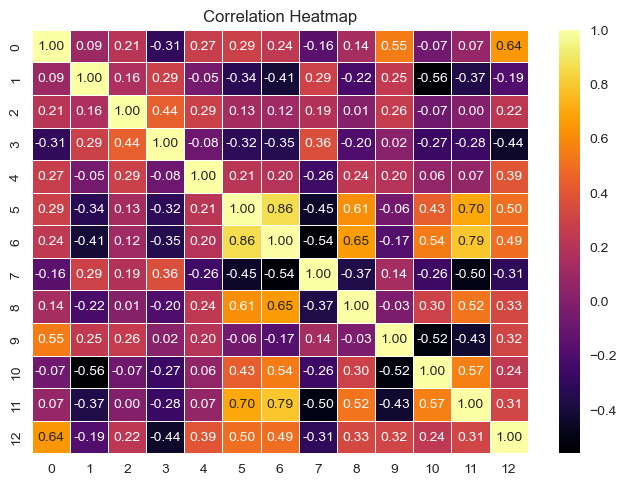

In [23]:
corrcoef = np.corrcoef(Datapoint, rowvar=False)
sns.heatmap(corrcoef, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5,annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


با توجه به ماتریس کورولیشن ، میتوانیم ببینیم که ستون های ۵،۶،۸،۱۱ با یکدیگر ویژگی های مشابه دارند، پس میتوانیم تعداد 
 را حساب کنیم : 10=1+4-13 principal coponents 

###  Data Preprocessing

In [24]:
Datapoint.head()

0     1     2     3    4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     12  
0  1065  
1  1050  
2  1185  
3  1480  
4   735

### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

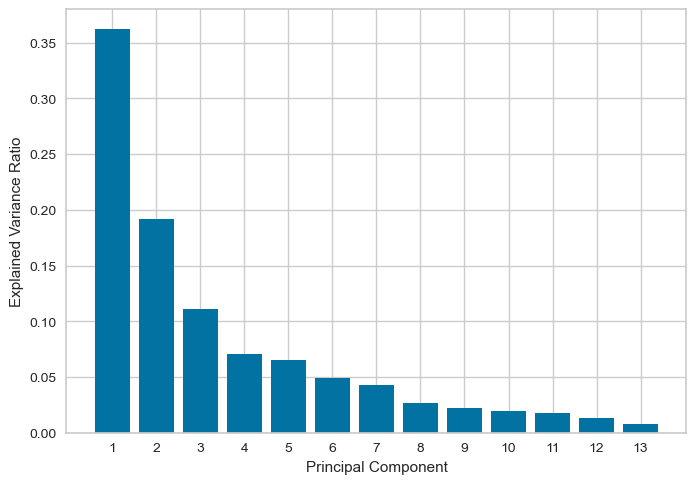

In [25]:
# Standardize the data
scaler = StandardScaler()
scaled_datapoint = scaler.fit_transform(Datapoint)

# Perform PCA
pca = PCA()
pca.fit(scaled_datapoint)

# Get the explained variance ratio
evr = pca.explained_variance_ratio_


# Plot the explained variance ratio for each principal component
labels = [str(x) for x in range(1, len(evr)+1)]
plt.bar(x=range(1,len(evr)+1), height=evr, tick_label=labels)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()
        


Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [26]:
# According to the issues mentioned above, we choose the number of principal components to be 10 

# Standardize the datapoint
standard = (Datapoint - np.mean(Datapoint, axis=0)) / np.std(Datapoint, axis=0)

# Calculate the covariance matrix and eigenvalues/eigenvectors of the standardized datapoint
eigenvalues, eigenvectors = np.linalg.eigh(np.cov(standard, rowvar=False))

# Sort the eigenvalues in descending order
index = np.argsort(eigenvalues)[::-1]
eigval = eigenvalues[index]
eigvec = eigenvectors[:,index]

# Select the top principal components
biggestEigval= eigvec[:, :10 ]

# Project the standardized datapoint onto the selected principal components
new_datapoint = np.dot(standard, biggestEigval)

### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

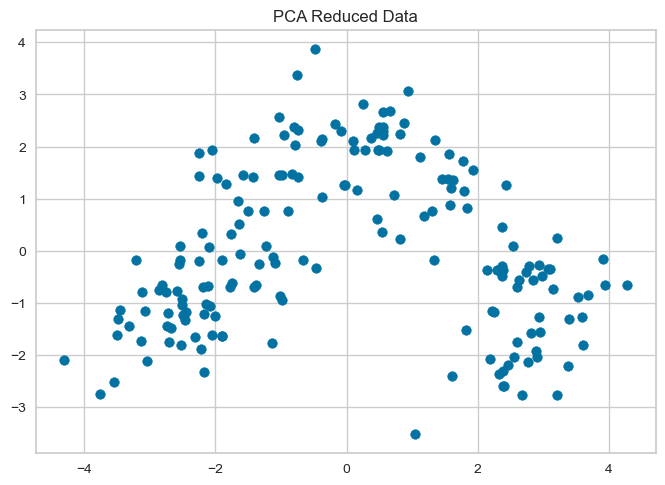

In [27]:
##Your Code start here
plt.scatter(new_datapoint[:, 0], new_datapoint[:,1])
plt.title('PCA Reduced Data')
plt.show()
##Your Code ends here

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




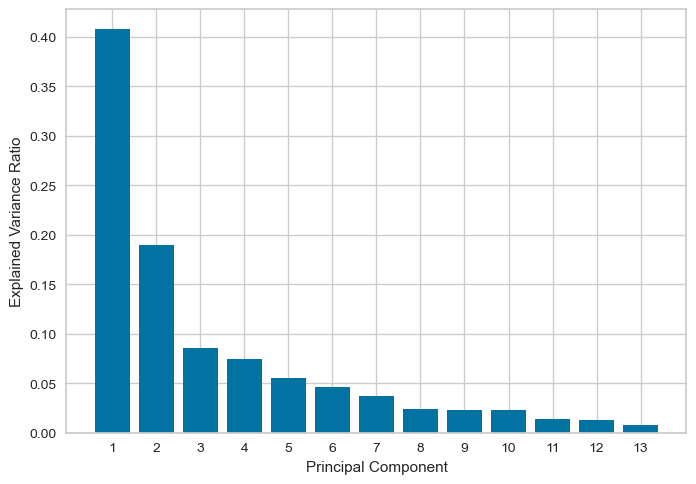

In [28]:
# Standardize the data
scaler = MinMaxScaler()
scaled_datapoint = scaler.fit_transform(Datapoint)

# Perform PCA
pca = PCA()
pca.fit(scaled_datapoint)

# Get the explained variance ratio
evr = pca.explained_variance_ratio_


# Plot the explained variance ratio for each principal component
labels = [str(x) for x in range(1, len(evr)+1)]
plt.bar(x=range(1,len(evr)+1), height=evr, tick_label=labels)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()
        


In [29]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Datapoint)

# Perform PCA
pca = PCA(n_components=2)
new_datapoint_minMax = pca.fit_transform(scaled_data)



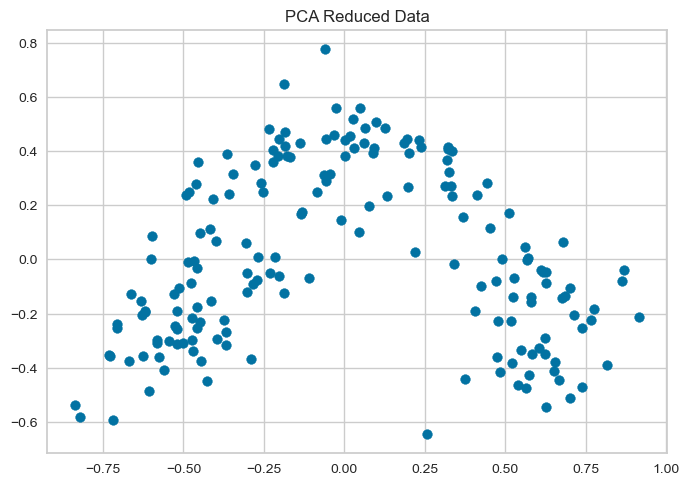

In [30]:
plt.scatter(new_datapoint_minMax[:, 0], new_datapoint_minMax[:, 1], marker='o')
plt.title('PCA Reduced Data')
plt.show()

Scaling data is crucial for machine learning, especially before applying Principal Component Analysis (PCA). MinMax Scaling and Standard Scaling are two prevalent techniques, each with distinct characteristics:
1. **MinMax Scaling:**
- **Purpose:** Transforms data to a specified range (commonly [0, 1]) by subtracting the minimum and dividing by the range.

- **Pros:** Preserves the original data distribution shape.

- **Cons:** Sensitive to outliers, potentially distorting results.

- **Use Cases:** Suitable when maintaining the relative order of values is essential.

2. **Standard Scaling:**
- **Purpose:** Adjusts data to have a mean of 0 and a standard deviation of 1 by subtracting the mean and dividing by the standard deviation.

- **Pros:** More robust to outliers, ensuring better model performance.

- **Cons:** Alters the original data range.

- **Use Cases:** Ideal when equal weight for features is crucial.

In summary, the choice between MinMaxScaler and StandardScaler depends on the specific works with the machine learning algorithm and the characteristics of the data, such as the presence of outliers and the assumption of the data distribution.



### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

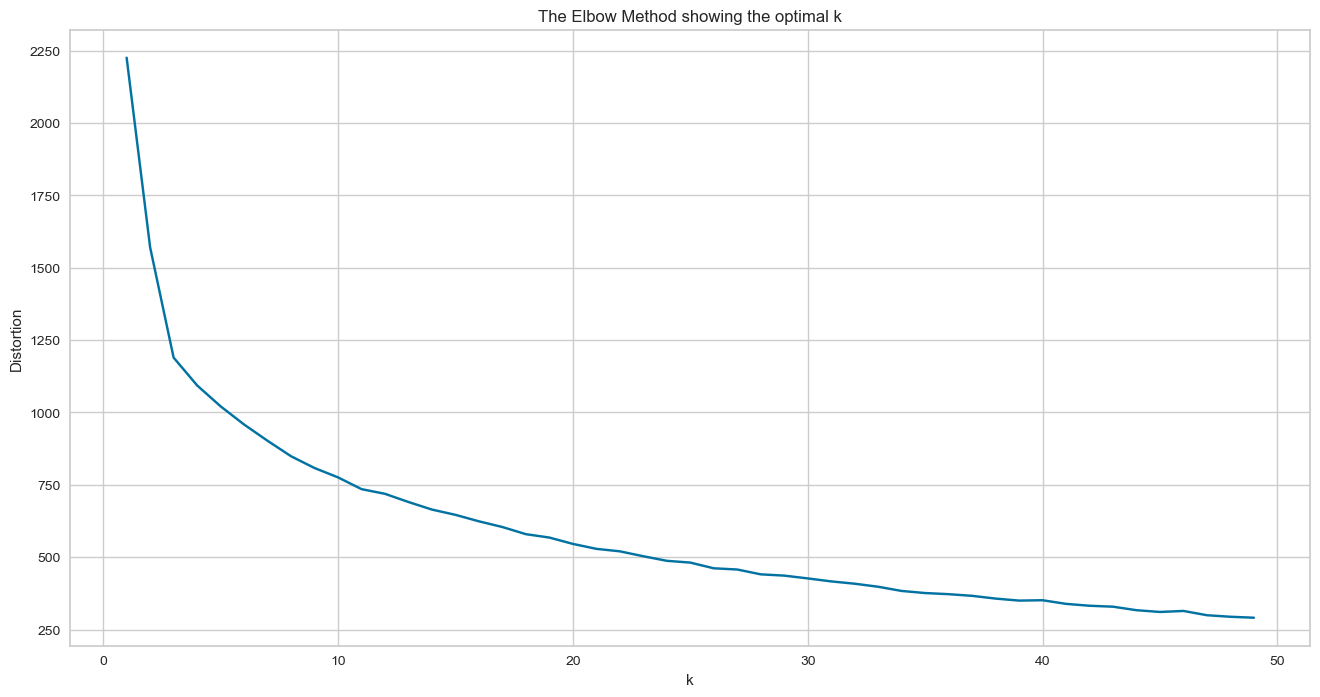

In [31]:
def elbow_method(data):
    distortions = []
    K = range(1,50)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)

    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    
elbow_method(new_datapoint)

What is inertia and silhouette metrics?
Explain them briefly.




1. Inertia :
Inertia is a pivotal metric in clustering, evaluating algorithm fitness by summing squared distances to cluster centroids. It aids in gauging internal cluster coherence. However, using inertia alone isn't conclusive for determining optimal cluster count; combining it with metrics like the silhouette score is customary.

2. Silhouette Score : 
The silhouette score assesses item-cluster alignment and cluster quality, considering distances between data points and cluster separations. Its scale of -1 to 1 indicates alignment strength, helping discern appropriate clustering and determine the optimal cluster count.

In [47]:
#You should save your final datapoints in pca_std_datapoint variable
pca_std_datapoint = new_datapoint
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00,  9.91it/s]


In [48]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00,  9.34it/s]


Plot the **inertia** and **silhouette ** values

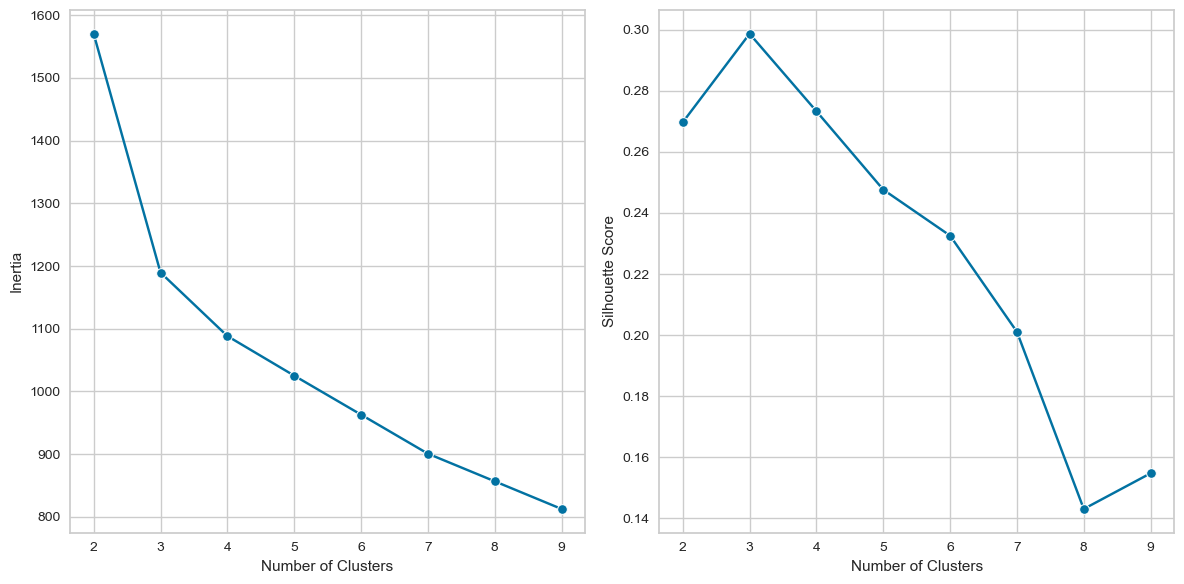

In [49]:
# Plot the inertia values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x=range(2, 10), y=inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
sns.lineplot(x=list(silhouette.keys()), y=list(silhouette.values()), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


Tune the hyper parameters based on your conclusions.

In [50]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)


/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

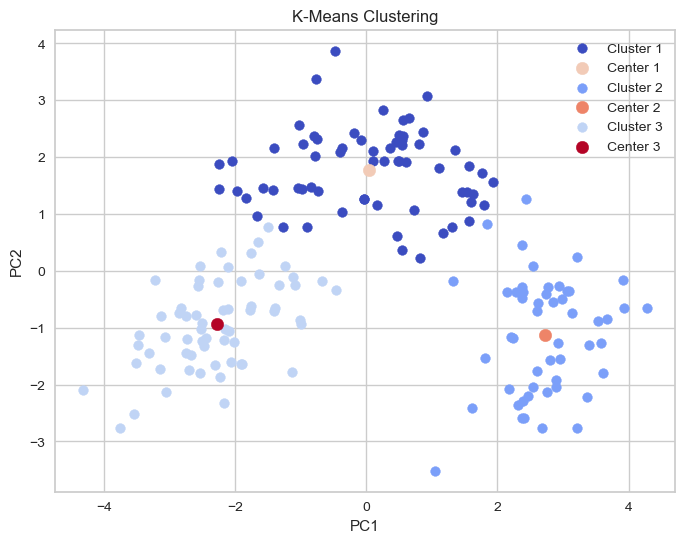

In [51]:
k=3
u_labels = np.unique(y_predict_kmeans1)
cmap = plt.get_cmap('coolwarm', 2*k)
centroids = model_kmeans.cluster_centers_

plt.figure(figsize=(8, 6))

for i in u_labels:
    plt.scatter(pca_std_datapoint[y_predict_kmeans1 == i , 0] , pca_std_datapoint[y_predict_kmeans1 == i , 1] ,color=cmap(i), label = 'Cluster '+str(i+1))
    plt.scatter(centroids[i,0] , centroids[i,1] , s = 80, color=cmap(i+k),label = 'Center '+str(i+1))
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


Do all previous steps for MinMax scaled data points.





/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

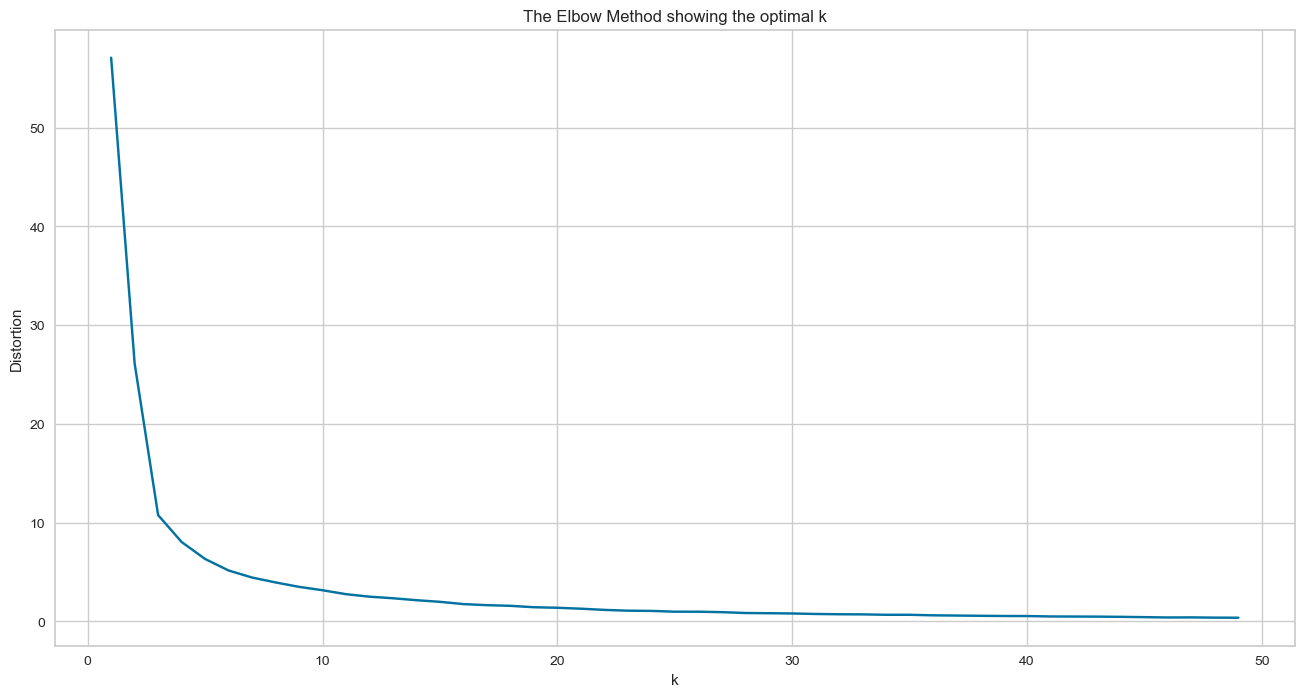

In [52]:
#using the elbow method to find the optimal number of clusters
elbow_method(new_datapoint_minMax)

In [53]:
#You should save your final datapoints in pca_std_datapoint variable
pca_std_datapoint_minMax = new_datapoint_minMax
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint_minMax)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 11.51it/s]


In [54]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint_minMax, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00,  9.03it/s]


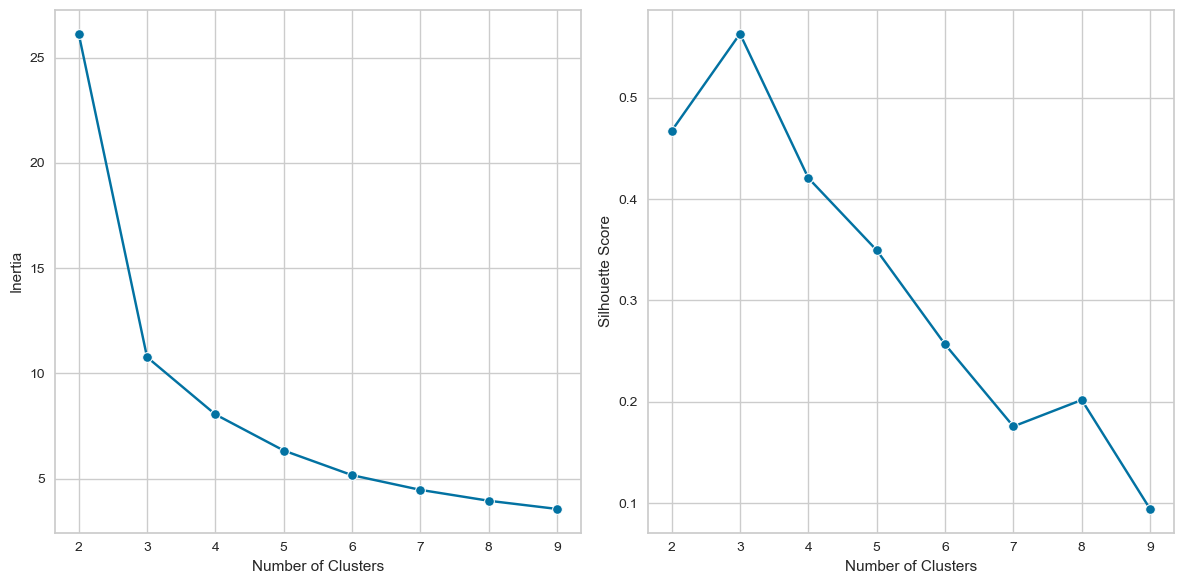

In [55]:
# Plot the inertia values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x=range(2, 10), y=inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
sns.lineplot(x=list(silhouette.keys()), y=list(silhouette.values()), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [56]:
model_kmeans2 = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans2 = model_kmeans2.fit_predict(pca_std_datapoint_minMax)

/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


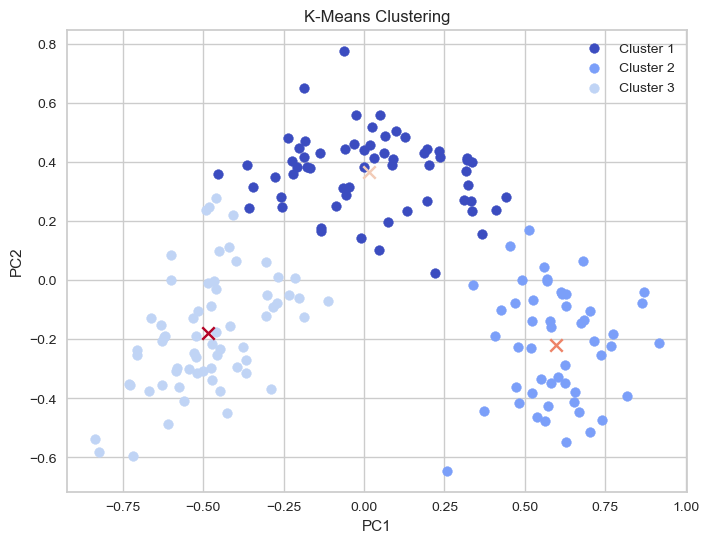

In [57]:
k=3
u_labels = np.unique(y_predict_kmeans2)
cmap = plt.get_cmap('coolwarm', 2*k)
centroids = model_kmeans2.cluster_centers_

plt.figure(figsize=(8, 6))

for i in u_labels:
    plt.scatter(pca_std_datapoint_minMax[y_predict_kmeans2 == i , 0] , pca_std_datapoint_minMax[y_predict_kmeans2 == i , 1] ,color=cmap(i), label = 'Cluster '+str(i+1))
    plt.scatter(centroids[i,0] , centroids[i,1] , marker="x" , s = 80, color=cmap(i+k))
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


Compare the results of different scaling methods in a PCA problem

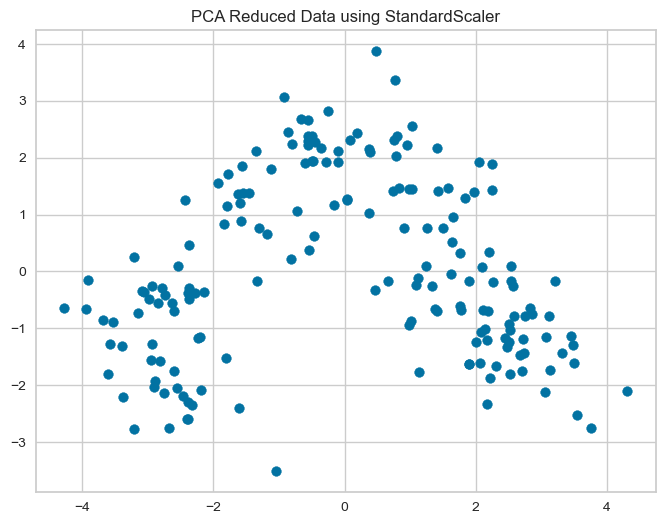

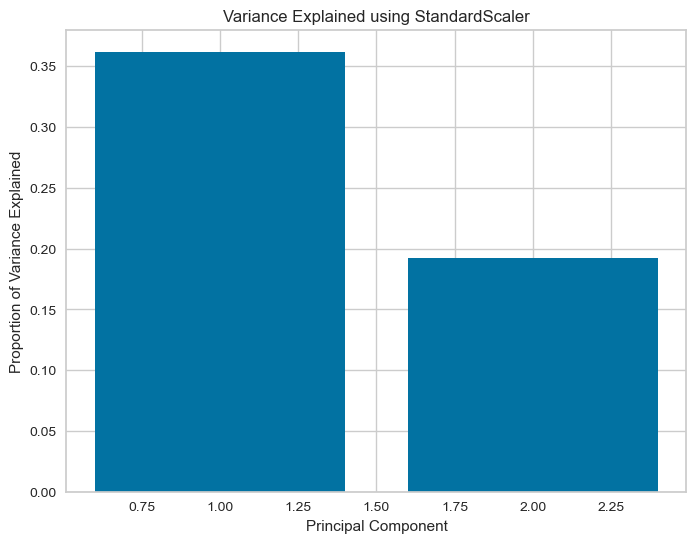

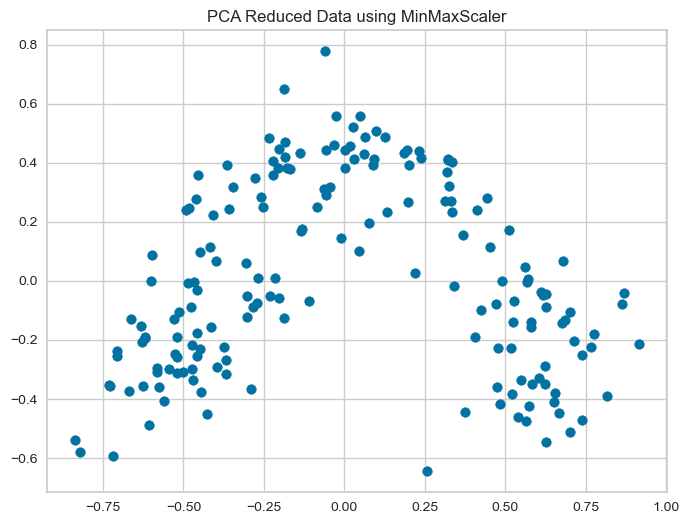

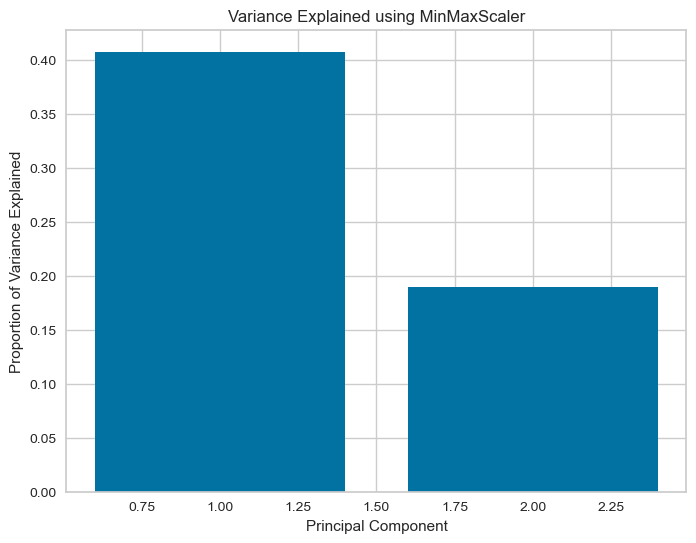

In [59]:


# Assuming 'data' is your original data
scalers = [StandardScaler(), MinMaxScaler()]
scaler_names = ['StandardScaler', 'MinMaxScaler']

for scaler, name in zip(scalers, scaler_names):
    # Scale the data
    scaled_data = scaler.fit_transform(Datapoint)

    # Perform PCA
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)

    # Plot the reduced data
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1])
    plt.title(f'PCA Reduced Data using {name}')
    plt.show()

    # Plot the explained variance
    plt.figure(figsize=(8, 6))
    plt.bar(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Proportion of Variance Explained')
    plt.title(f'Variance Explained using {name}')
    plt.show()

As you can see, in the analysis of clustering, a subtle quantitative variance exists in the relative positioning of the data and clustering results.